In [5]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from random import *
%matplotlib inline

## Geração de dados e conjuntos de treino e teste 

In [6]:
def rand():
    return round(randint(0,1) + uniform(-0.1, 0.1),3)

def binaryToDecimal(n): 
    return int(n,2) 

n_instances = 1500
X = np.zeros((n_instances, 3), dtype=np.float32)
y = np.zeros(n_instances, dtype=np.int)


for i in range(n_instances):
    val = np.array([rand(), rand(), rand()])
    X[i] = val

    code = np.array([round(val[0]), round(val[1]), round(val[2])])
    label = np.array([code[0]*4 + code[1]*2 + code[2]])
    y[i] = label
    
oh = OneHotEncoder()
y_oh = oh.fit_transform(y.reshape(-1,1)).toarray()


X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 0)

In [7]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer="glorot_uniform", activation = 'linear', input_dim=X_train.shape[1]))
classifier.add(Dense(8, kernel_initializer="glorot_uniform", activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 150,validation_data=(X_val, y_val),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,min_delta=0.1, verbose=10)])

Epoch 1/150
30/30 [==============================] - 0s 9ms/step - loss: 1.8240 - accuracy: 0.2594 - val_loss: 1.7907 - val_accuracy: 0.2542
Epoch 2/150
30/30 [==============================] - 0s 3ms/step - loss: 1.7244 - accuracy: 0.3073 - val_loss: 1.6853 - val_accuracy: 0.3667
Epoch 3/150
30/30 [==============================] - 0s 2ms/step - loss: 1.6292 - accuracy: 0.4792 - val_loss: 1.5891 - val_accuracy: 0.5083
Epoch 4/150
30/30 [==============================] - 0s 2ms/step - loss: 1.5368 - accuracy: 0.6062 - val_loss: 1.4945 - val_accuracy: 0.6708
Epoch 5/150
30/30 [==============================] - 0s 3ms/step - loss: 1.4449 - accuracy: 0.7094 - val_loss: 1.4004 - val_accuracy: 0.7250
Epoch 6/150
30/30 [==============================] - 0s 3ms/step - loss: 1.3535 - accuracy: 0.7688 - val_loss: 1.3062 - val_accuracy: 0.7958
Epoch 7/150
30/30 [==============================] - 0s 3ms/step - loss: 1.2617 - accuracy: 0.8281 - val_loss: 1.2141 - val_accuracy: 0.8458
Epoch 8/150
3

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


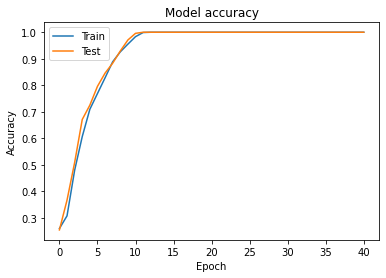

In [9]:
history_dict = history.history
print(history_dict.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

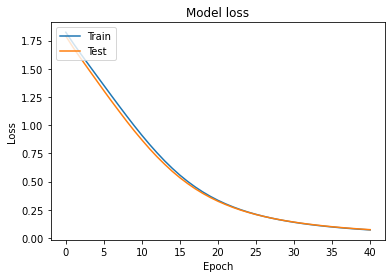

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')